In [51]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=115899 sha256=068bbc0b1e6aff4e2675921fa9dc7a20cc68b57f35693ec6e3e1cbcced657c23
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qr7hoxf/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [171]:
import matplotlib.pyplot as plt
import straph as sg

In [4]:
plt.rcParams["figure.figsize"] = (22,15)

# Temporal Metawalks in Stream Graph

In this tutorial we will use the example below, feel free to change it (cf: Notebook on random stream graphs).

In [12]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  8
Nb of segmented links :  11.0
Nb of event times :  11


<AxesSubplot:xlabel='t', ylabel='Nodes'>

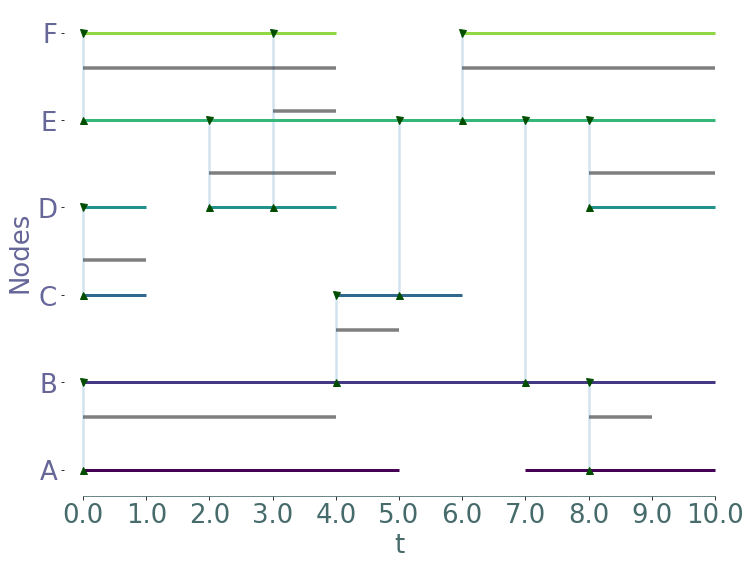

In [13]:
S.plot()

In [5]:
S.links

[(0, 1), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

In [6]:
S.link_presence

[[0.0, 4.0, 8.0, 9.0],
 [4.0, 5.0],
 [7.0, 7.0],
 [0.0, 1.0],
 [5.0, 5.0],
 [2.0, 4.0, 8.0, 10.0],
 [3.0, 4.0],
 [0.0, 4.0, 6.0, 10.0]]

In the following we use Straph's API to compute different types of temporal paths.

 We can consider two types of source and destination : a temporal node $(t_0,t_1,v) \in \overline{W}$ or a node $u \in V$.
Resulting in 4 types of temporal paths:

    - temporal source -> destination
    - temporal source -> temporal destination
    - source -> temporal destination
    - source -> destination

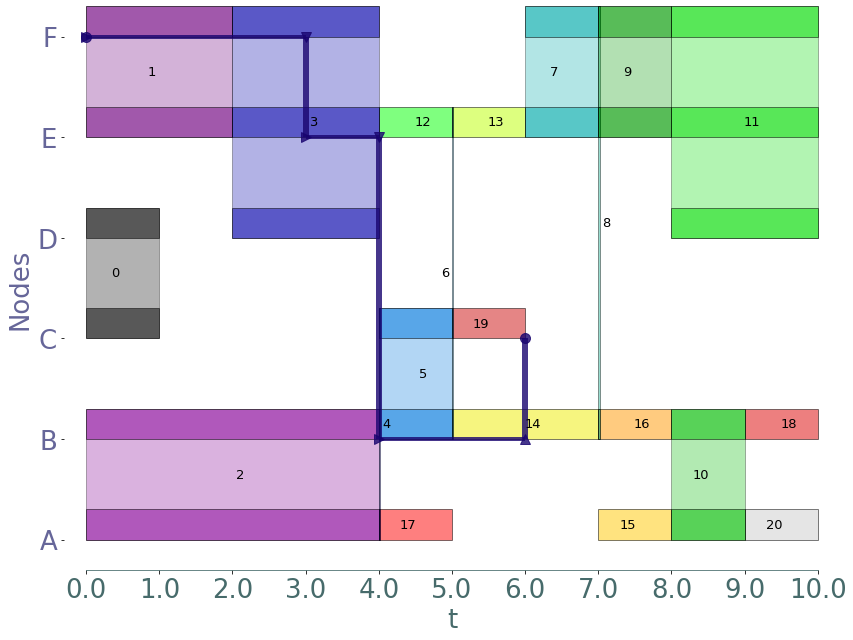

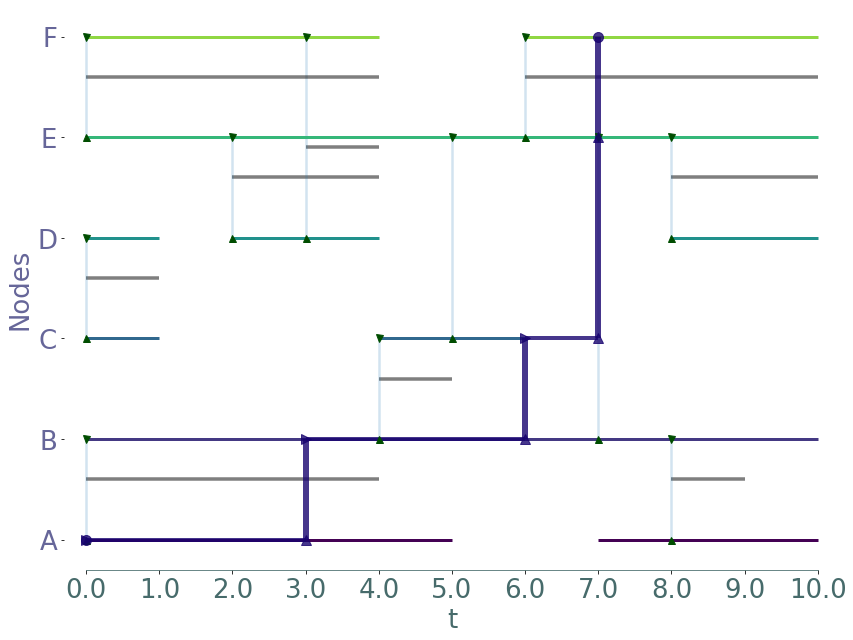

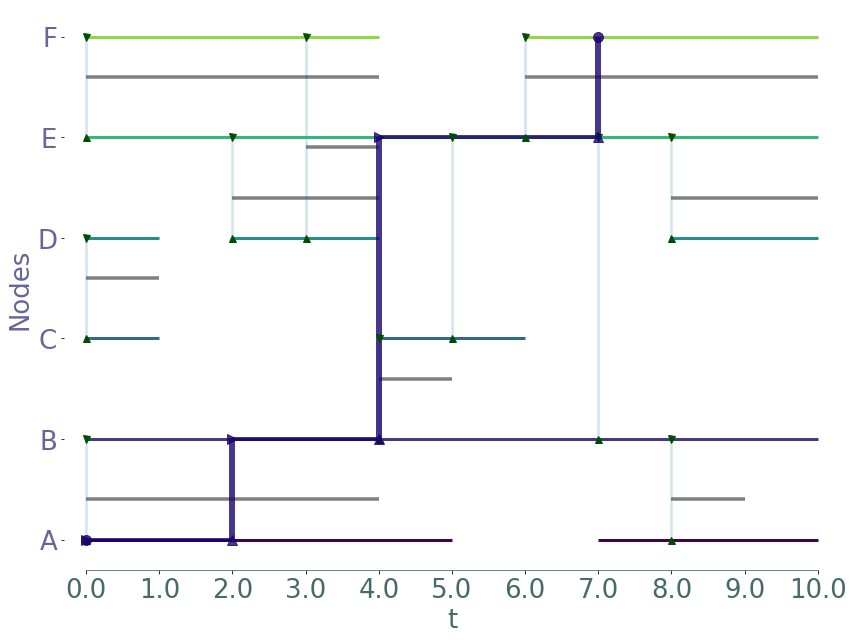

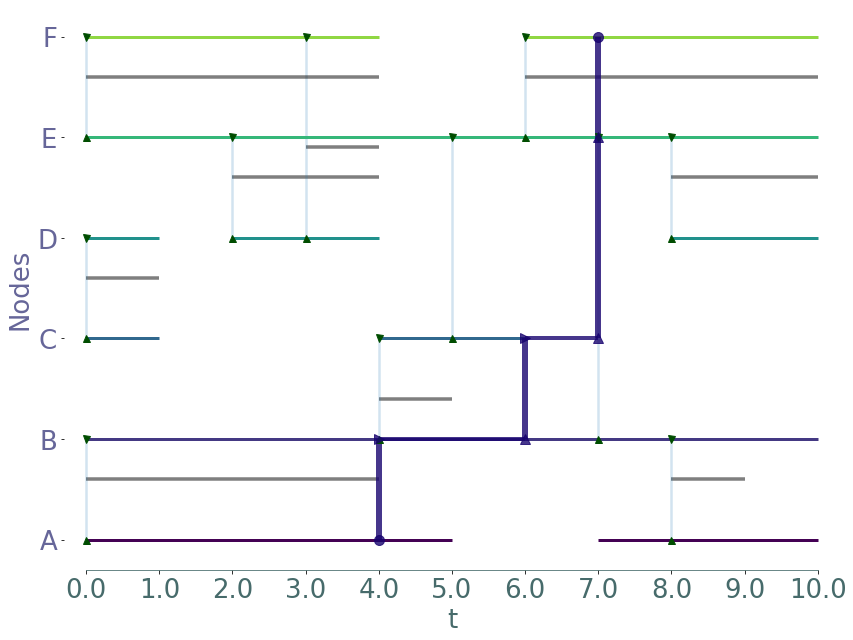

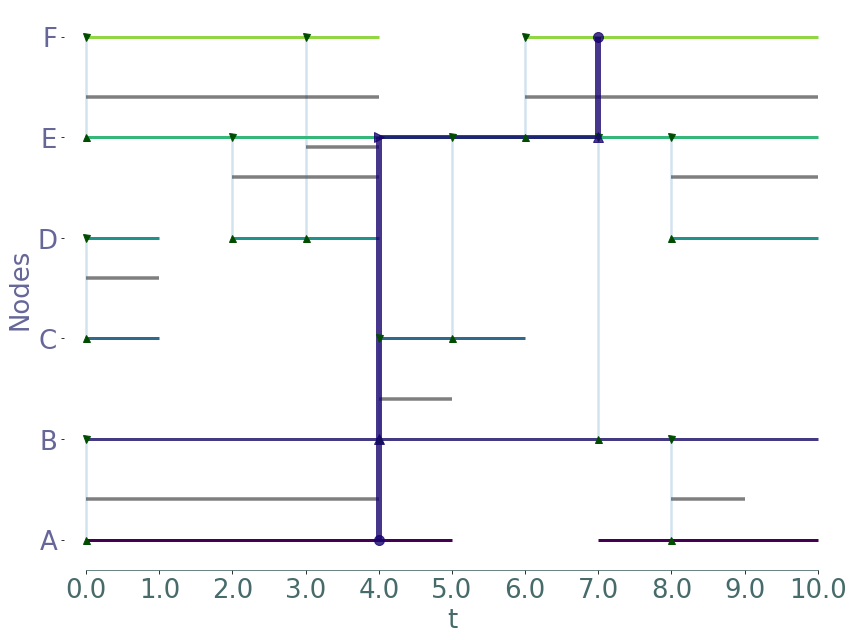

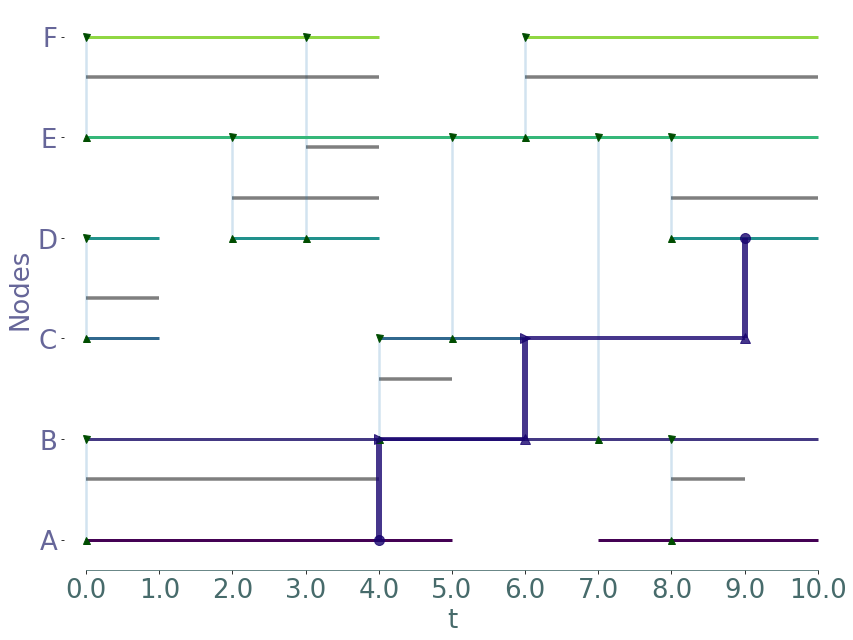

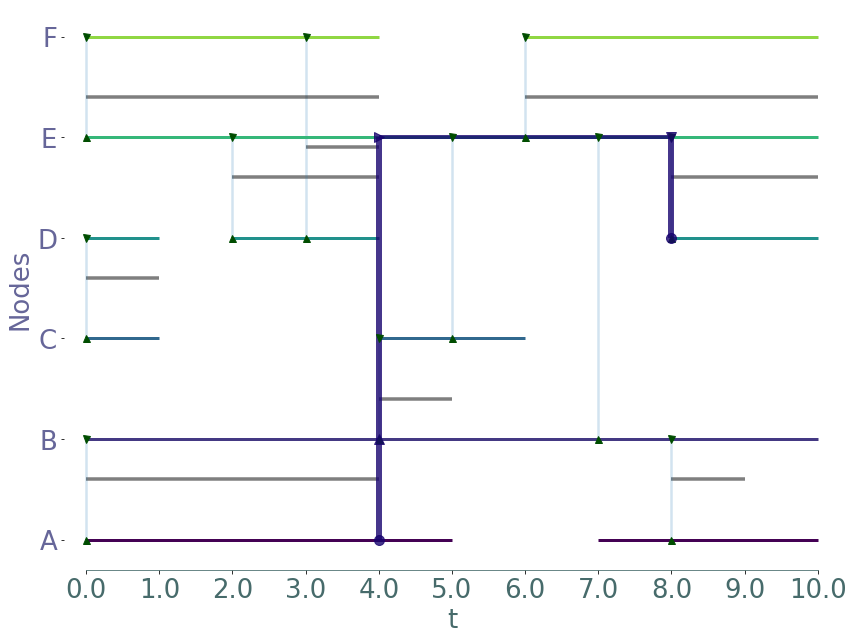

{5: 0, 4: 0.0, 3: 2.0, 2: 5.0, 1: 5.0, 0: 8.0}

In [7]:
P = sg.Path(times=[0, 3, 4, 6],
         links=[(5, 5), (5, 4), (4, 1), (1, 2)], )
P.plot(S, dag=True)

# FoP (0,A)-F
P = sg.Path(times=[0, 3, 6, 7, 7],
         links=[(0, 0), (0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFoP (0,A)-F
P = sg.Path(times=[0, 2, 4, 7],
         links=[(0, 0), (0, 1), (1, 4), (4, 5)], )
P.plot(S)

# FP A-F
P = sg.Path(times=[4, 6, 7, 7],
         links=[(0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFP A-F
P = sg.Path(times=[4, 4, 7],
         links=[(0, 1), (1, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SP A-D
P = sg.Path(times=[4, 6, 9],
         links=[(0, 1), (1, 2), (2, 3)])
P.plot(S)
# plt.show()

#  FSP A-D
P = sg.Path(times=[4, 4, 8],
         links=[(0, 1), (1, 4), (4, 3)], )
P.plot(S)
plt.show()

S.times_to_reach((0, 5, 0))


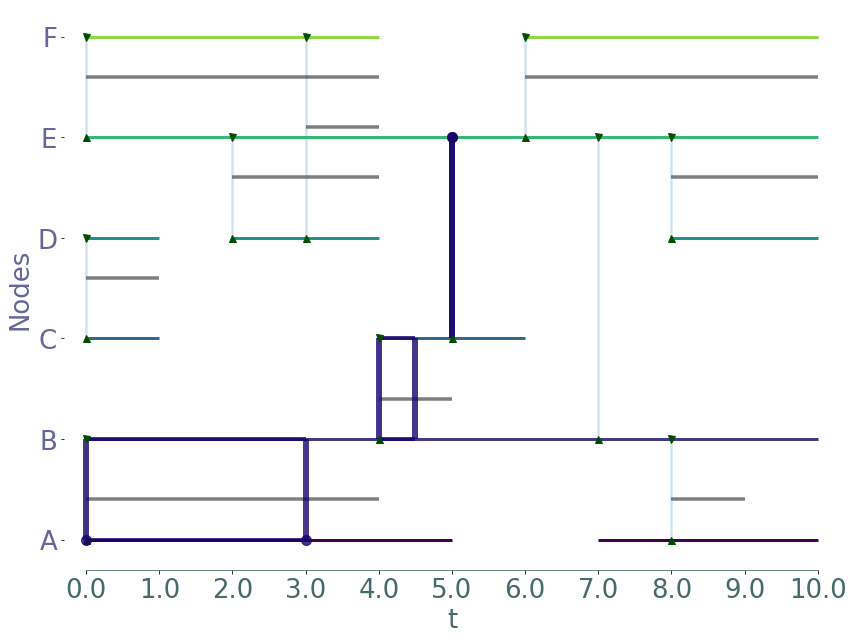

In [14]:
P = sg.Metawalk(time_intervals=[(0,3), (4,4.5), (5,5)],
         nodes=[0,1,2,4], )
P.plot(S)
plt.show()


In [16]:
print (P)

 0 (0, 3) 1 (4, 4.5) 2 (5, 5) 4


In [17]:
str(P).split(" ")

['', '0', '(0,', '3)', '1', '(4,', '4.5)', '2', '(5,', '5)', '4']

In [3]:
plt.rcParams["figure.figsize"] = (22,15)

In [1]:
import matplotlib.pyplot as plt
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "noeuds_jouet.sg",
                      path_links=path_directory + "liens_jouet.sg")
S.describe()

Nb of Nodes :  3
Nb of segmented nodes :  3.0
Nb of links :  2
Nb of segmented links :  4.0
Nb of event times :  8


In [2]:
l = S.metapaths(0)

In [3]:
for el in l:
    for e in el:
        print (e)

 0 (0.0, 2.0) 1 | volume = 0.0 + 2.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (3.0, 4.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


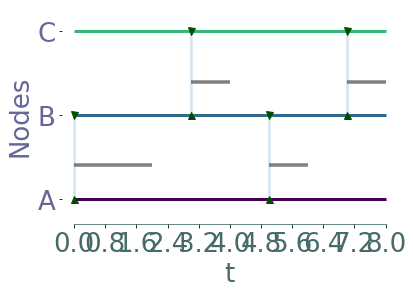

In [4]:
S.plot()

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "noeuds_jouet.sg",
                      path_links=path_directory + "liens_jouet.sg")
S.describe()

Nb of Nodes :  4
Nb of segmented nodes :  4.0
Nb of links :  3
Nb of segmented links :  4.0
Nb of event times :  6


In [2]:
S.link_presence[-1]

[4.0, 4.0]

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


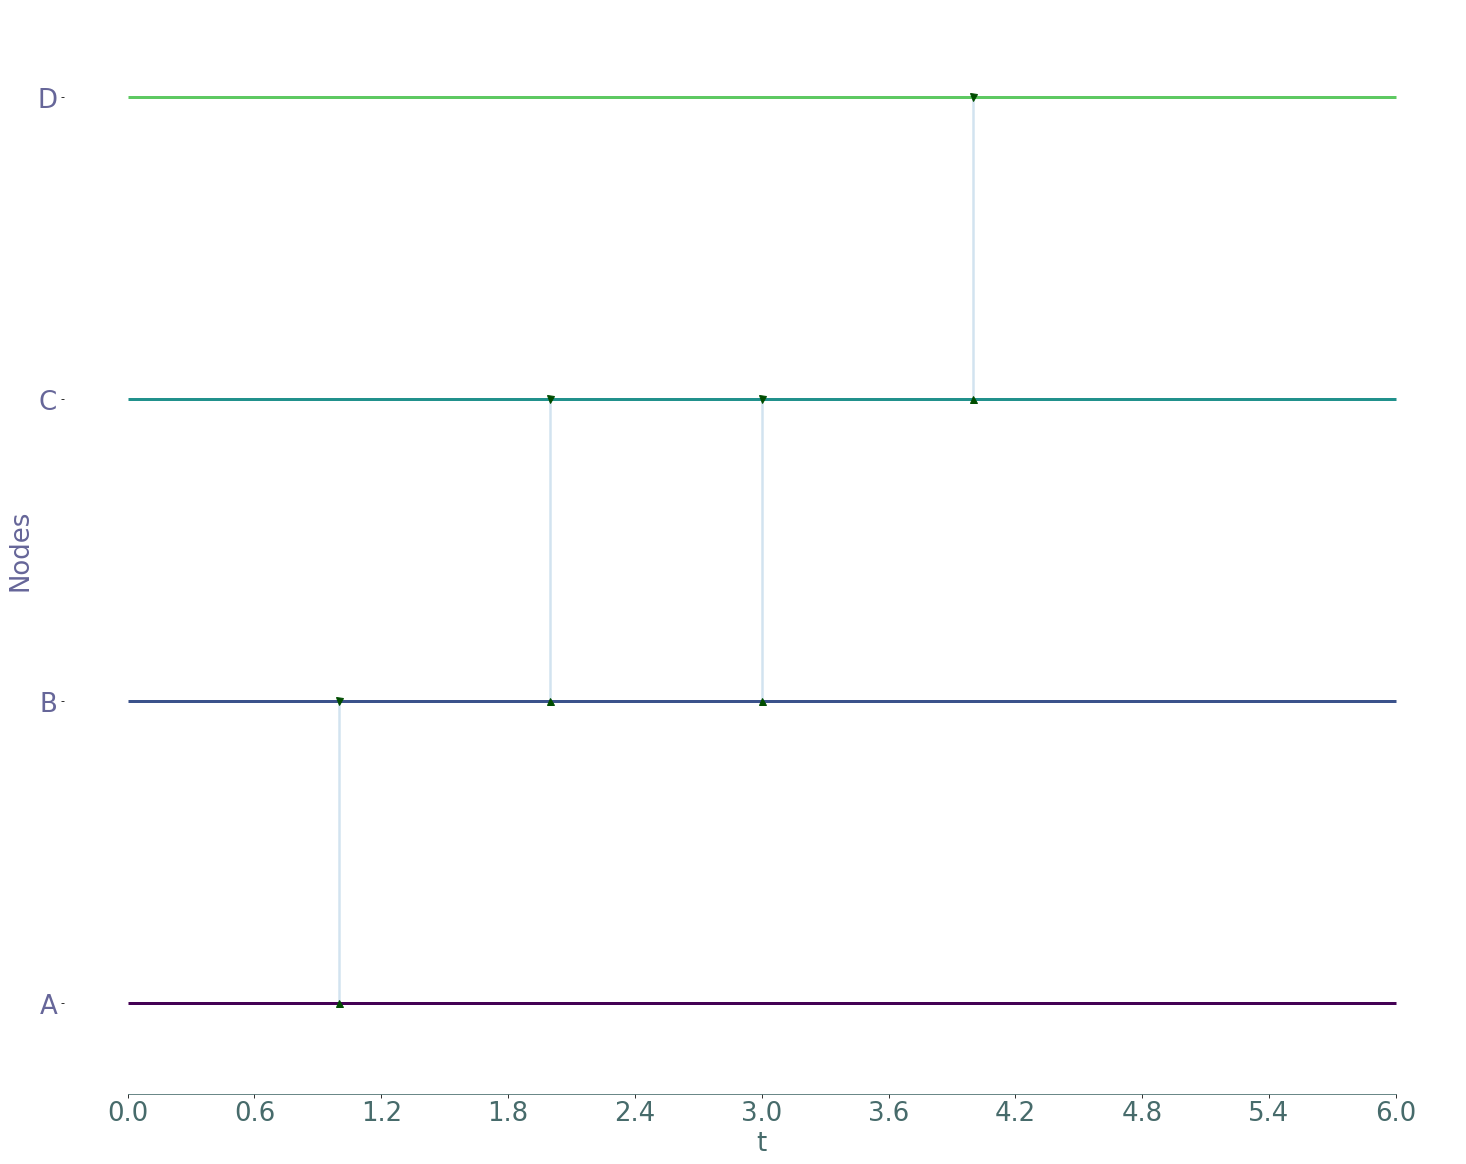

In [3]:
S.plot()

In [4]:
nouveau = S.fragmented_stream_graph()

In [5]:
nouveau.links[-1]

(2, 3)

In [6]:
nouveau.link_presence[-1]

[4.0, 4.0]

<AxesSubplot:xlabel='t', ylabel='Nodes'>

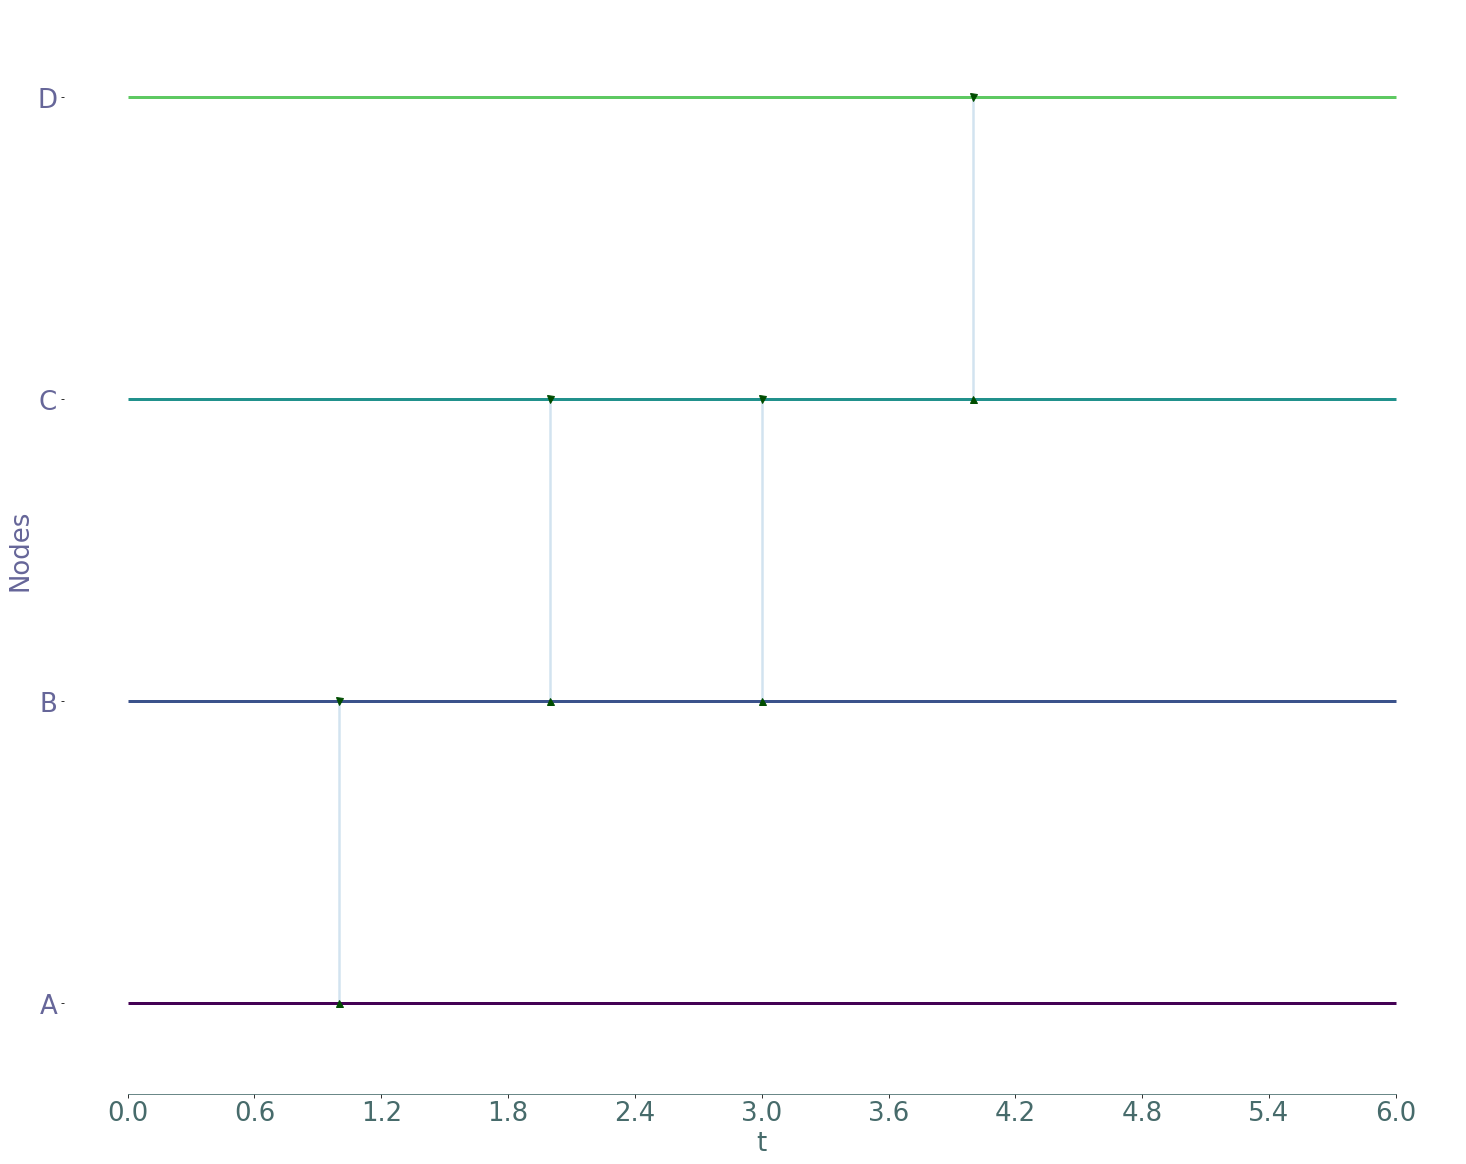

In [7]:
nouveau.plot()

In [8]:
node = 2
ll = nouveau.metapaths(node)
print("result : ")
i=0
for el in ll:
    for e in el:
        print (e)
        i += 1
print (i)

result : 
 2 (4.0, 4.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²
1


In [9]:
ll = nouveau.filter_fastest_metapaths_slow( nouveau.metapaths(node))
print("result : ")
i=0
res = []
for el in ll:
    for e in el.values():
        for j in e:
            res.append(j)
            print (j)
            i += 1
print(i)

result : 
 2 (4.0, 4.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²
1


In [10]:
l = nouveau.fastest_paths_from_vertex(node,0)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 2 (4.0, 4.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²
1


In [11]:
lll = nouveau.fastest_paths_from_vertex(node,1)
print("resultat : ")
res3=[]
i=0
for el in lll:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res3.append(ee)
print(i)

resultat : 
 2 (2.0, 2.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 2 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 2 (4.0, 4.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²
3


In [12]:
llll = nouveau.count_walks_paper(node)
print("resultat : ")

resultat : 


In [13]:
#cur_best
print(llll[1][5])

IndexError: list index out of range

In [14]:
#pre
print(llll[0][5])

IndexError: list index out of range

In [15]:
#cur_best
print(llll[1][4])

IndexError: list index out of range

In [16]:
#pre
print(llll[0][4])

IndexError: list index out of range

In [17]:
#cur_best
print(llll[1][3])

{4.0: (4.0, 1)}


In [18]:
#pre
print(llll[0][3])

{4.0: {(2, 0.0): (4.0, 4.0)}}


In [19]:
#cur_best
print(llll[1][2])

{}


In [20]:
#pre
print(llll[0][2])

{}


In [21]:
#cur_best
print(llll[1][1])

{2.0: (2.0, 1), 3.0: (3.0, 1)}


In [22]:
#pre
print(llll[0][1])

{2.0: {(2, 0.0): (2.0, 2.0)}, 3.0: {(2, 0.0): (3.0, 3.0)}}


In [23]:
#cur_best
print(llll[1][0])

{}


In [24]:
#pre
print(llll[0][0])

{}


In [25]:
lat = nouveau.latencies(llll[1])
node_check = 3

In [26]:
lat[2]

{}

In [27]:
contri, prev_next = nouveau.contribution_each_latency(lat)

In [28]:
contri[2]

{}

In [29]:
prev_next[node_check]

{}

In [30]:
contri[1]

{2.0: (0, 6.0), 3.0: (0, 6.0)}

In [31]:
llll[2]

{}

In [32]:
G = nouveau.predecessor_graph(llll[0])

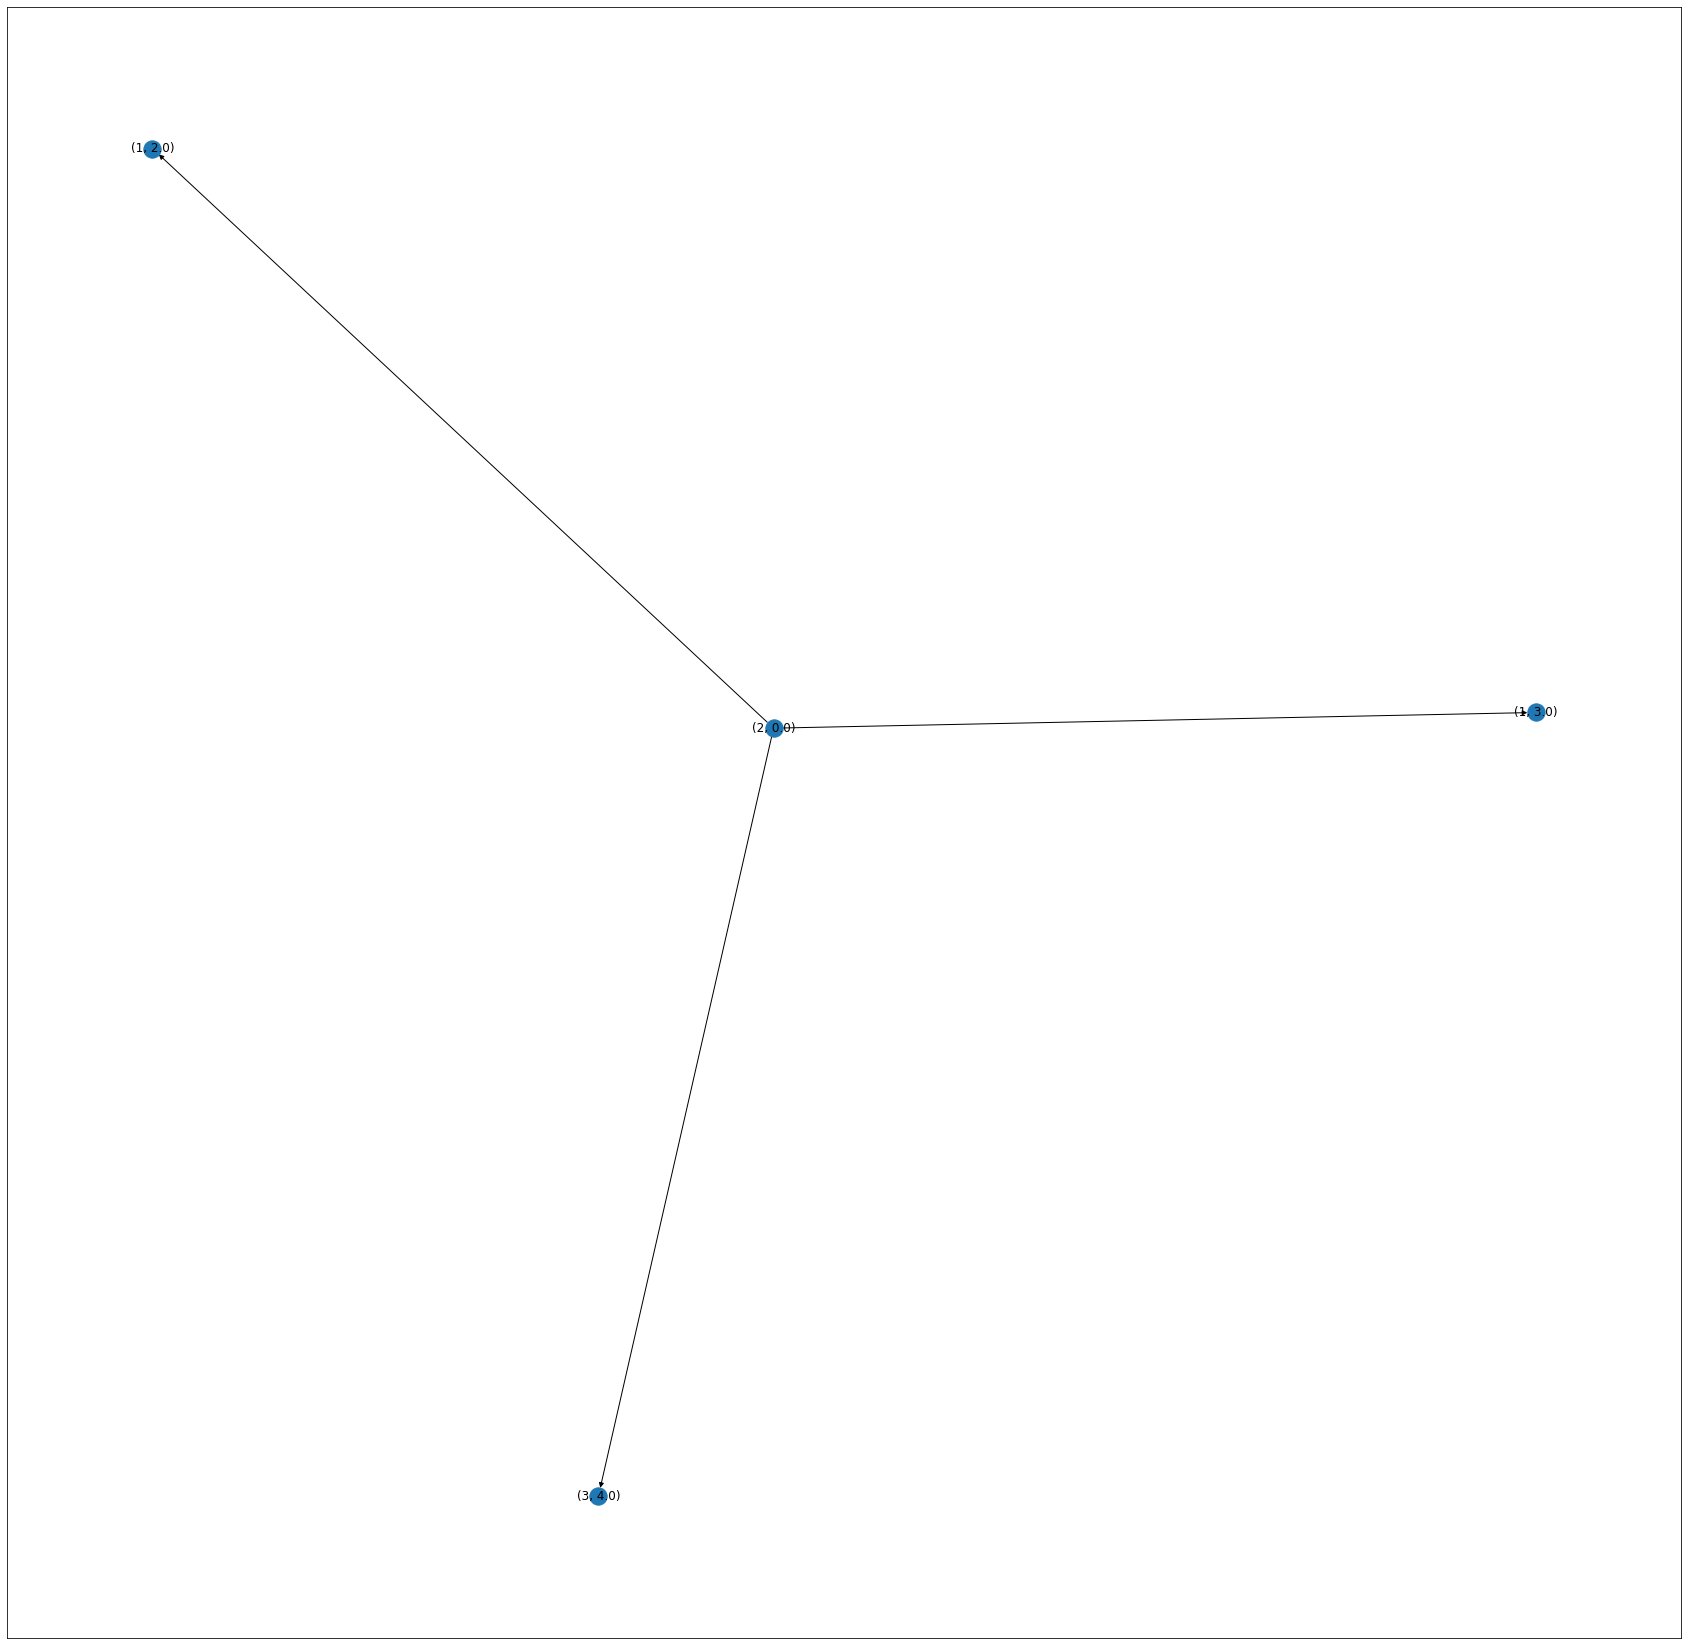

In [33]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(G,arrows=True,width = 1,ax = ax)

In [34]:
for e in G[(0,0.0)]:
    print(G[(0,0.0)][e])

KeyError: (0, 0.0)

In [35]:
(list(nx.simple_cycles(G)))

[]

In [36]:
temp_node = (4,4)
for e in nx.all_simple_paths(G,(0,0.0),temp_node):
    print(e)

NodeNotFound: source node (0, 0.0) not in graph

In [37]:
temp_node = (4,7)
for e in nx.all_simple_paths(G,(0,0.0),temp_node):
    print(e)

NodeNotFound: source node (0, 0.0) not in graph

In [38]:
paths = nx.all_simple_paths(G,(0,0.0),temp_node)
for path in map(nx.utils.pairwise, paths):
    #print(list(path))
    for e in path:
        print(G[e[0]][e[1]]['interval'],end="")
    print("")
    

NodeNotFound: source node (0, 0.0) not in graph

In [39]:
sigma = nouveau.volume_metapaths(node, G)

node (1, 2.0)
last (2.0, 2.0) before_last (-1, -1) b True instantenous True
poly  (1, 2.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
node (1, 3.0)
last (3.0, 3.0) before_last (-1, -1) b True instantenous True
poly  (1, 3.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
node (3, 4.0)
last (4.0, 4.0) before_last (-1, -1) b True instantenous True
poly  (3, 4.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³


In [40]:
for e in sigma.keys():
    print(e,sigma[e])

(1, 2.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
(1, 3.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
(3, 4.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³


In [41]:
sigma[temp_node]

KeyError: (4, 7)

In [42]:
sigma[(4,4)]

KeyError: (4, 4)

In [43]:
sigma_r = nouveau.volume_metapaths_with_restingpaths(node, G, sigma)

noder (1, 2.0) predr (-1, -1)
succ
noder (1, 3.0) predr (1, 2.0)
succ
noder (3, 4.0) predr (1, 3.0)
succ


In [44]:
for e in sigma_r.keys():
    print(e,sigma_r[e][1])

(1, 2.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
(1, 3.0) 2.0
(3, 4.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³


In [45]:
sigma_r[(4, 31.0)][1]

KeyError: (4, 31.0)

In [46]:
pointer = nouveau.pointers(sigma_r)
print(pointer)

{(0, 0.0): (-1, -1), (0, 1.0): (-1, -1), (0, 2.0): (-1, -1), (0, 3.0): (-1, -1), (0, 4.0): (-1, -1), (0, 6.0): (-1, -1), (1, 0.0): (-1, -1), (1, 1.0): (-1, -1), (1, 2.0): (1, 2.0), (1, 3.0): (1, 3.0), (1, 4.0): (1, 3.0), (1, 6.0): (1, 3.0), (2, 0.0): (-1, -1), (2, 1.0): (-1, -1), (2, 2.0): (-1, -1), (2, 3.0): (-1, -1), (2, 4.0): (-1, -1), (2, 6.0): (-1, -1), (3, 0.0): (-1, -1), (3, 1.0): (-1, -1), (3, 2.0): (-1, -1), (3, 3.0): (-1, -1), (3, 4.0): (3, 4.0), (3, 6.0): (3, 4.0)}


In [47]:
pointer2 = nouveau.pointers2(contri)
print(pointer2[(2,3)])

(-1, -1)


In [48]:
nouveau.delta_svvt( node, 1, 3.0, lat, contri, prev_next, sigma_r, pointer, pointer2)

t_contri 1 3.0
t_sigma 1 3.0
prev [0, 2.0]
next [6.0]
vol_tv 2.0 [2.]
s_prime 3.0 s_left 0 a_right 6.0 a_prime 3.0
enum poly 18.0
actual enum 0
left 0 vol_tv 2.0 right 0
denum poly 2.0
actual denum 0
enum (18.0,) denum (2.0,)
contrib 9.0
s_prime 0 s_left 2.0 a_right 6.0 a_prime 3.0
enum poly -12.0
actual enum 0
left 1.0 vol_tv 2.0 right 0
denum poly 3.0
actual denum 0
enum (-12.0,) denum (3.0,)
contrib 5.0


Polynomial([5.], domain=[-1.,  1.], window=[-1.,  1.])

In [49]:
nouveau.delta_svt(node, 1, 3.0, G, lat, contri, prev_next, sigma_r, pointer, pointer2)

new_call, vt (1, 3.0)
t_contri 1 3.0
t_sigma 1 3.0
prev [0, 2.0]
next [6.0]
vol_tv 2.0 [2.]
s_prime 3.0 s_left 0 a_right 6.0 a_prime 3.0
enum poly 18.0
actual enum 0
left 0 vol_tv 2.0 right 0
denum poly 2.0
actual denum 0
enum (18.0,) denum (2.0,)
contrib 9.0
s_prime 0 s_left 2.0 a_right 6.0 a_prime 3.0
enum poly -12.0
actual enum 0
left 1.0 vol_tv 2.0 right 0
denum poly 3.0
actual denum 0
enum (-12.0,) denum (3.0,)
contrib 5.0


Polynomial([5.], domain=[-1.,  1.], window=[-1.,  1.])

In [50]:
for e in res:
    if e not in res2:
        print(e)

In [49]:
for e in res2:
    if e not in res:
        print(e)

In [50]:
for e in res:
    if e not in res3:
        print(e)

In [51]:
for e in res3:
    if e not in res:
        print(e)

In [52]:
for e in res3:
    print(e)
    print("=>",e.fastest_meta_walk())

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
=>  0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
=>  0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
=>  0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
=>  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
=>  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
=>  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x

In [53]:
for e in res3:
    print(e.fastest_meta_walk())

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵


In [54]:
for e in res:
    if e.passes_through(2.4,1):
        print(e)

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹ + 0.0·x²


In [55]:
nouveau.betweenness_temporal_node(2.4,1)

TypeError: fastest_paths_from_vertex() missing 1 required positional argument: 'boo'

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (22,15)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_8_nodes.sg",
                      path_links=path_directory + "latapy_test_8_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  12


<AxesSubplot:xlabel='t', ylabel='Nodes'>

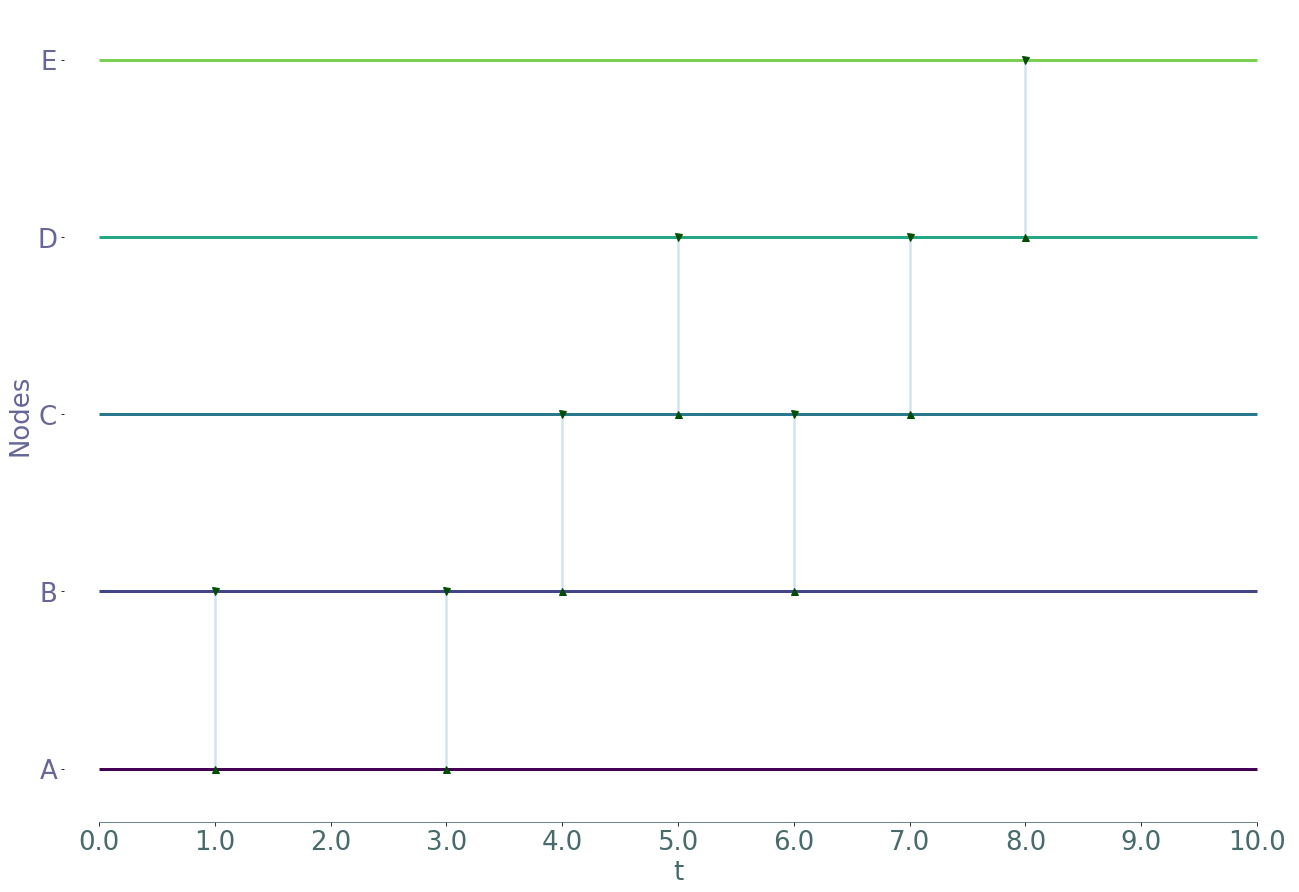

In [38]:
S.plot()

In [39]:
nouveau = S.fragmented_stream_graph()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

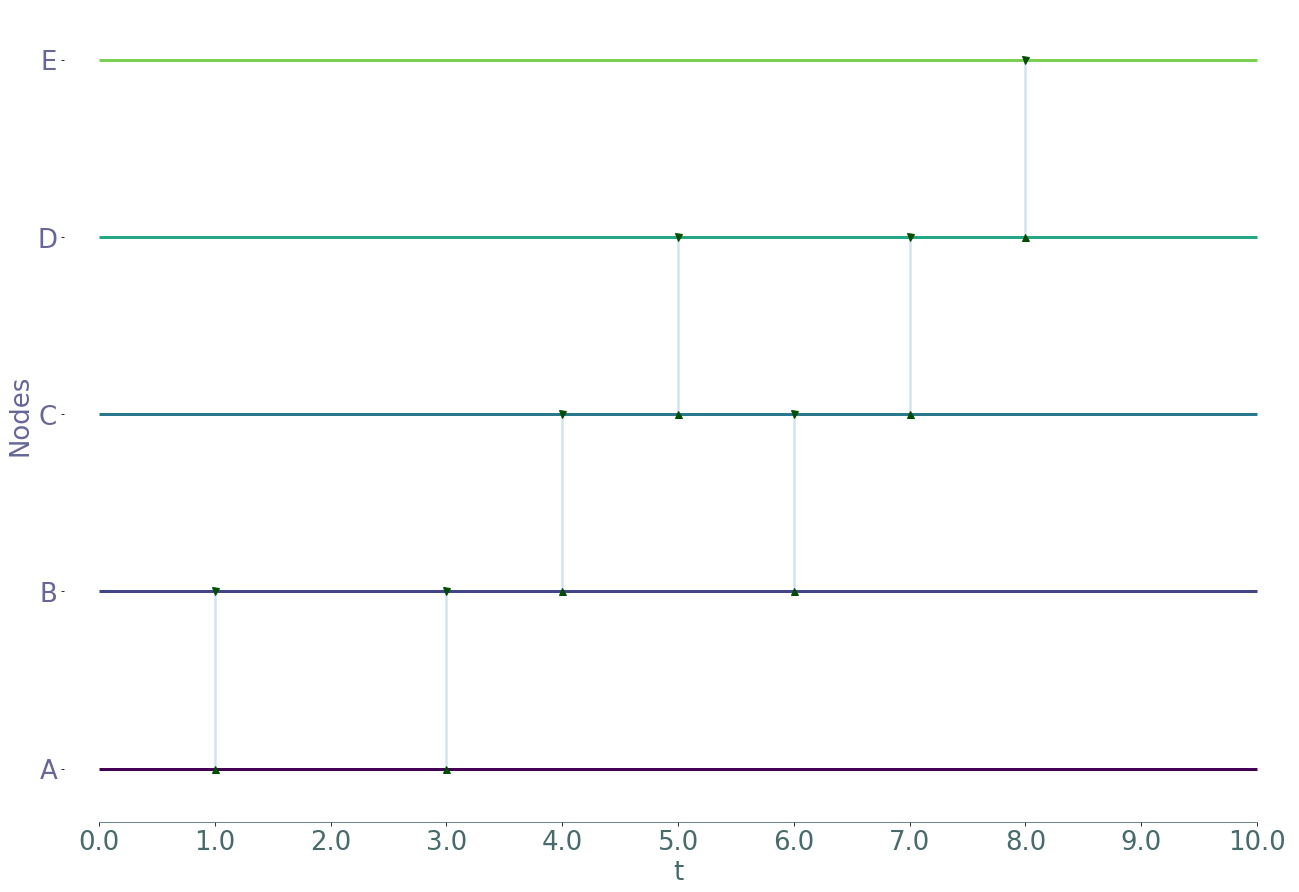

In [40]:
nouveau.plot()

In [41]:
node = 0
l = nouveau.fastest_paths_from_vertex(node)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
7


In [42]:
for e in res2:
    if e.passes_through(3.5,1):
        print(e)

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [43]:
for e in l:
    print(e.keys())

dict_keys([])
dict_keys([(1.0, 1.0), (3.0, 3.0)])
dict_keys([(3.0, 4.0)])
dict_keys([(3.0, 5.0)])
dict_keys([(3.0, 8.0)])


In [44]:
nouveau.betweenness_temporal_node(3.5,1)

all_fastest [[set(), { 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹,  0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴}], [set(), set(), { 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹,  1 (6.0, 6.0) 2 | volume = 1.0 + 0.0·x¹}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²,  1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}], [set(), set(), set(), { 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹,  2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹}

0